In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [2]:
# Load the dataset
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
df['type'] = df['type'].astype('category').cat.codes
df['nameOrig'] = df['nameOrig'].astype('category').cat.codes
df['nameDest'] = df['nameDest'].astype('category').cat.codes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int8   
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(2), int64(3), int8(1)
memory usage: 443.0 MB


In [6]:
df.isnull().sum()


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
import pandas as pd

# Assuming your DataFrame is named 'df'
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['amount'] < lower_bound) | (df['amount'] > upper_bound)]

# Remove outliers
df_no_outliers = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]


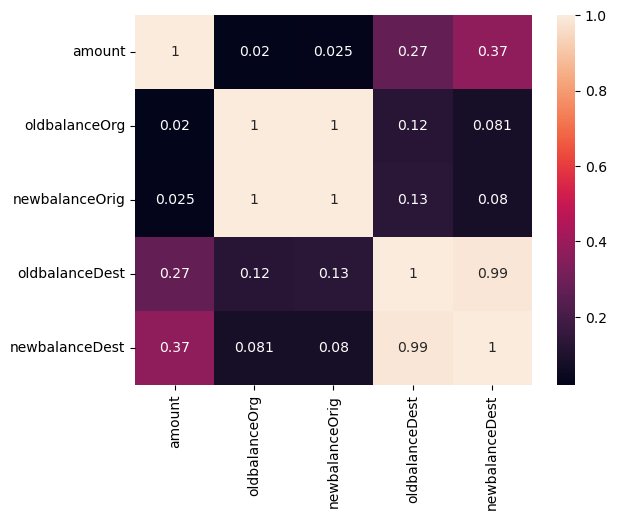

In [8]:

# 1. Data Cleaning
# Handle missing values
df.dropna(inplace=True)

# Handle outliers (using Z-score as an example)
from scipy.stats import zscore
z_scores = zscore(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']])
df_no_outliers = df[(np.abs(z_scores) < 3).all(axis=1)]

# Handle multi-collinearity
correlation_matrix = df_no_outliers[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Drop highly correlated columns
df_no_multicollinearity = df_no_outliers.drop(['oldbalanceOrg', 'newbalanceOrig'], axis=1)



In [9]:


# Prepare features and target variable
X = df_no_multicollinearity.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)
y = df_no_multicollinearity['isFraud']


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=42)


In [ ]:
# Train the model
model.fit(X_train, y_train)

In [ ]:
# Variable Selection (Feature Importance)
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
sorted_feature_importance = feature_importance.sort_values(ascending=False)
print(sorted_feature_importance)


In [ ]:
#  Key Factors Predicting Fraudulent Customer
top_features = sorted_feature_importance[:3].index
print("Top Features:", top_features)

In [ ]:
#  Model Performance
y_pred = model.predict(X_test)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("ROC-AUC Score:", roc_auc)

In [ ]:
# Key Factors Predicting Fraudulent Customer
top_features = sorted_feature_importance[:3].index
print("Top Features:", top_features)
